In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [2]:
## loading yolo modeles
net =  cv2.dnn.readNetFromDarknet('yolov2.cfg','yolov3-spp.weights')

In [3]:
classes = []
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

In [4]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

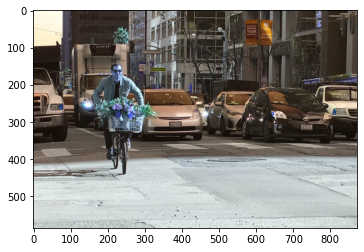

In [6]:
img =  cv2.imread('bike.jpg')
plt.imshow(img)


In [7]:
ht, wt, _ = img.shape

In [8]:
blob = cv2.dnn.blobFromImage(img , 1/255,(416,416), (0,0,0), swapRB = True, crop = False)
blob.shape

(1, 3, 416, 416)

In [9]:
net.setInput(blob)

In [10]:
last_layer = net.getUnconnectedOutLayersNames()

In [11]:
layer_out = net.forward(last_layer)


In [12]:
boxes = []
confidences = []
class_ids = []

for output in layer_out:
    for detection in output:
        score = detection[6:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > .6:
            center_x = int(detection[0]*wt)
            center_y = int(detection[1]*ht)
            w = int(detection[2]* wt)
            h = int(detection[3]* ht)
            
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            boxes.append([x,y,w,h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)

In [13]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, .6, .4)
indexes

array([[5],
       [4],
       [1],
       [6],
       [2]], dtype=int32)

In [14]:
font = cv2.FONT_HERSHEY_PLAIN
colors  =  np.random.uniform(0,255, size = (len(boxes), 3))

In [15]:
for i in indexes.flatten():
    x,y,w,h = boxes[i]
    cv2.rectangle
    label = str(classes[class_ids[i]])
    confindence = str(round(confidences[i], 2))
    color = colors[i]
    cv2.rectangle(img, (x,y),(x+w,y+h), color , 2)
    #cv2.putText(img, label +" "+ confidence, (x,y+20), font , 2 ,(0,0,0), 2)


In [ ]:
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()